<a href="https://colab.research.google.com/github/Yoshibansal/Extracting_faces-eyes_from_mutiple_pics/blob/master/Extracting_faces_eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
#Create a cascade Classifier objects
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('/haarcascade_eye.xml')

In [0]:
def face_detect(img_path):
  #To read the image 
  #Set the path of the image 
  img = cv2.imread(img_path)
  #Reading the image as gray scale image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #search the co-ordinates of the image
  faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
  #for adding the rectangle boxes around the faces and eyes
  for (x,y,w,h) in faces:
      cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = img[y:y+h, x:x+w]
      eyes = eye_cascade.detectMultiScale(roi_gray)
      for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  #printing the image with detected faces and eyes
  cv2_imshow(img)
  return faces,img,eyes

In [0]:
import pathlib
def extract_face(faces,img,count):
  #for extracting faces from an image
  for x,y,w,h in faces:
    pathlib.Path("/face_detect/{}person".format(count)).mkdir(parents=True, exist_ok=True)
    print("Person ",count)
    extracted_face = img[y:y+h, x:x+w]
    cv2_imshow(extracted_face)
    path = "/face_detect/{}person/per{}.jpeg".format(count,count)
    print("Face saved (True/False): ",cv2.imwrite(path,extracted_face))
    print("")
    count += 1
  return count

In [0]:
def extract_eye(faces,eyes,img,count_e):
  #for extracting eyes from an image
  for (x,y,w,h) in faces:
    print("Person {} eyes".format(count_e))
    roi_color = img[y:y+h, x:x+w]
    eye_no = "Left"
    for (ex,ey,ew,eh) in eyes:
        print("{} eye ".format(eye_no))
        extracted_eye = roi_color[ey:ey+eh, ex:ex+ew]
        #cv2_imshow(cv2.resize(extracted_eye,(int(extracted_eye.shape[1]*2),int(extracted_eye.shape[0]*2))))
        cv2_imshow(extracted_eye)
        path = "/face_detect/{}person/{}.jpeg".format(count_e,eye_no)
        print("Eye saved (True/False): ",cv2.imwrite(path,extracted_eye))
        eye_no = "Right" 
    print("")
    count_e += 1
  return count_e


In [0]:
import glob
!mkdir /face_detect
!mkdir /face_detect/pic

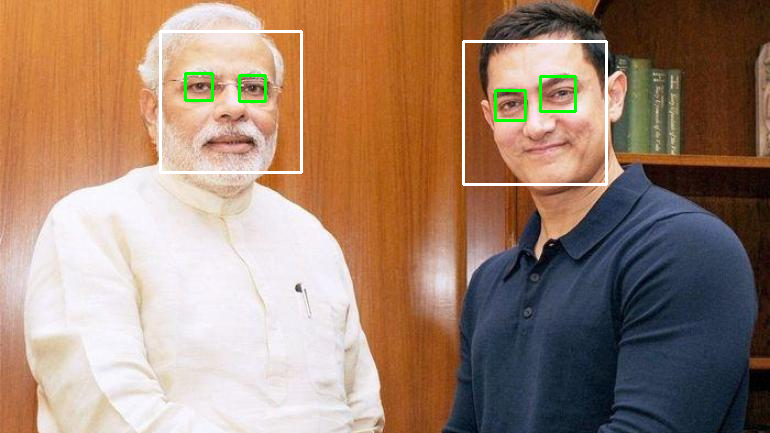

Person  10


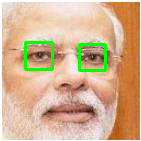

Face saved (True/False):  True

Person  11


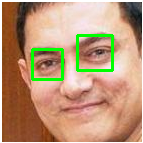

Face saved (True/False):  True

Person 10 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


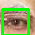

Eye saved (True/False):  True

Person 11 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


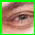

Eye saved (True/False):  True



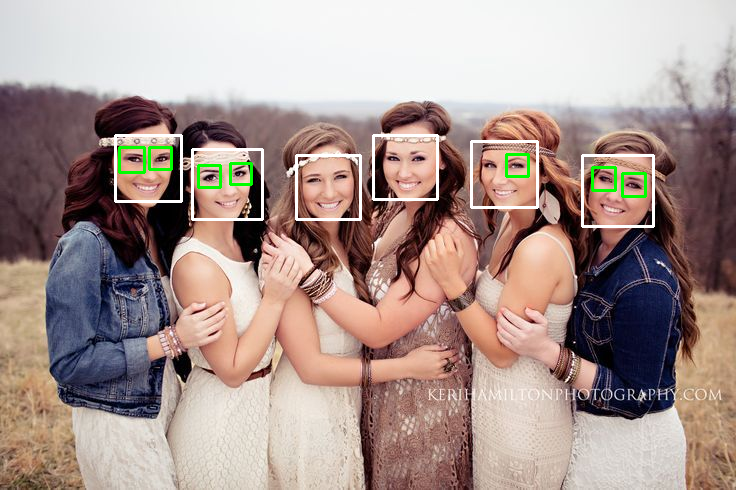

Person  12


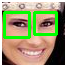

Face saved (True/False):  True

Person  13


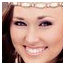

Face saved (True/False):  True

Person  14


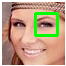

Face saved (True/False):  True

Person  15


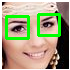

Face saved (True/False):  True

Person  16


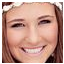

Face saved (True/False):  True

Person  17


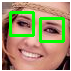

Face saved (True/False):  True

Person 12 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True

Person 13 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True

Person 14 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True

Person 15 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True

Person 16 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True

Person 17 eyes
Left eye 


Eye saved (True/False):  True
Right eye 


Eye saved (True/False):  True



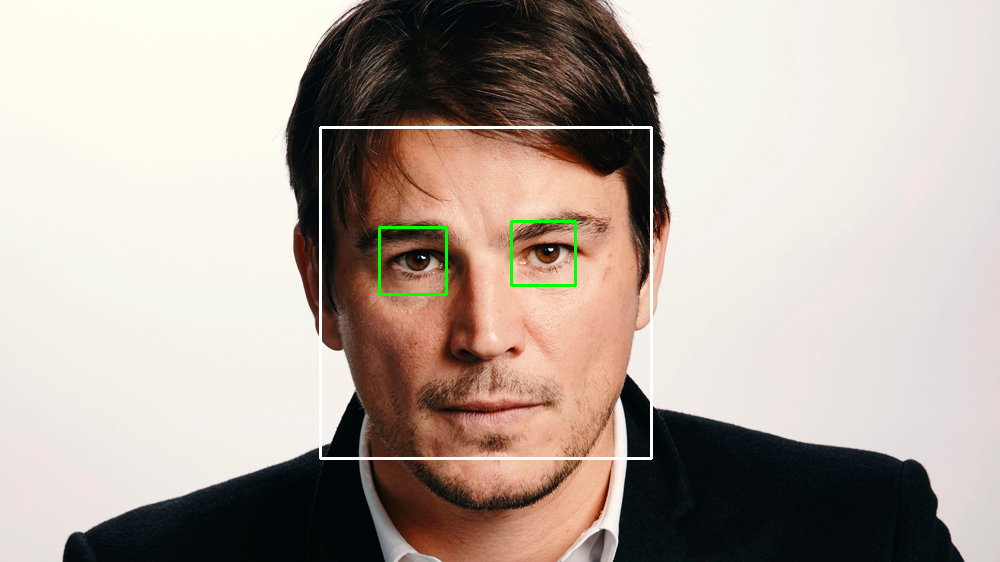

Person  18


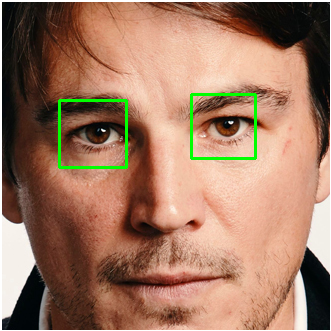

Face saved (True/False):  True

Person 18 eyes
Left eye 


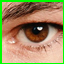

Eye saved (True/False):  True
Right eye 


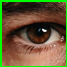

Eye saved (True/False):  True

Number of faces found :  18
Number of eyes found :  18


In [13]:
topic = "pic";
path_ = '/face_detect/{}/*.jpg'.format(topic)
count_g = 1
count_e = 1
for filename in glob.glob(path_):
  face_d,image,eye_d = face_detect(filename)
  count_g = extract_face(face_d, image, count_g)
  count_e = extract_eye(face_d, eye_d,image, count_e)
  
print("Number of faces found : ",count_g-1)
print("Number of eyes found : ",count_e-1)